# Practicals for lecture 1.5

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/practicals/Practicals_1.5.ipynb)

#### 1.5.0 Plotting with `matplotlib`


In [2]:
# Take the meteo dataset using the function below
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def get_meteo_dataset():
    """Get a meteo dataset from the open-meteo API using a fixed window.
    Note how easy it is to get data from the web with pandas! As long as we give the URL of the csv data, pandas can read it.
    """
    np.random.seed(42)
    # URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-10&end_date=2023-05-28&format=csv"
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m&start_date=2025-02-25&end_date=2025-05-04&format=csv"
    df = pd.read_csv(URL, skiprows=6)  # read the csv file, skipping the first 3 rows (a header)
    df.columns = [col.split(" ")[0] for col in df.columns]  # simplify column names
    df["time"] = pd.to_datetime(df["time"])  # convert the time column to datetime
    df["month"] = df["time"].dt.month
    df["hour"], df["dayofyear"] = df["time"].dt.hour, df["time"].dt.dayofyear  # extract the hour and day of year
    return df

# This new meteo dataset has columns for the day of the year, 
# hour of the day, and day of the week.
meteo_df = get_meteo_dataset()
meteo_df.head()

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m,month,hour,dayofyear
0,2025-02-25 00:00:00,8.5,84,0.0,13.7,194,2,0,56
1,2025-02-25 01:00:00,8.3,87,0.1,13.5,209,2,1,56
2,2025-02-25 02:00:00,8.0,93,0.6,12.1,203,2,2,56
3,2025-02-25 03:00:00,8.1,95,0.5,13.4,204,2,3,56
4,2025-02-25 04:00:00,8.1,95,0.3,11.9,215,2,4,56


[Text(0.5, 0, 'Wind speed'), Text(0, 0.5, 'Temp'), (0.0, 30.0)]

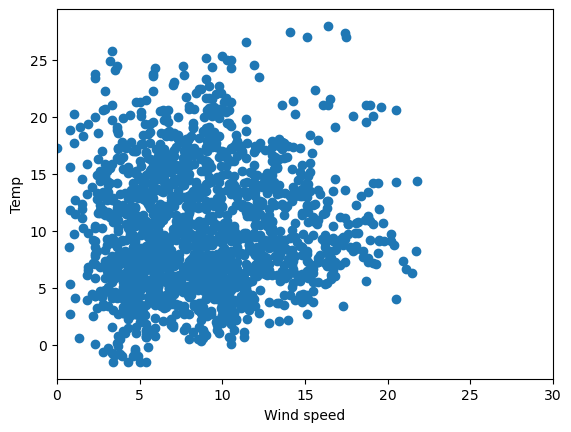

In [5]:
# Use matplotlib obj oriented interface to create a figure and axis object, 
# and scatter the wind speed vs the relative humidity.


[Text(0.5, 0, 'Wind speed'), Text(0, 0.5, 'Temp'), (0.0, 30.0)]

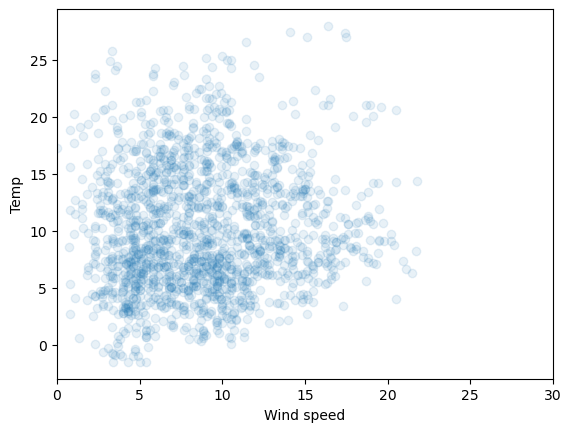

In [8]:
# Make a new plot and specify an alpha value < 1 (transparency) for the scatterplot:
f, ax = plt.subplots()
ax.scatter(meteo_df["wind_speed_10m"], meteo_df["temperature_2m"], alpha=0.1)

# Use methods of the axis object to set the axes names, 
# and restrict the wind speed axis between 0 and 30 km/h
ax.set(xlabel="Wind speed", ylabel="Temp", xlim=[0, 30])

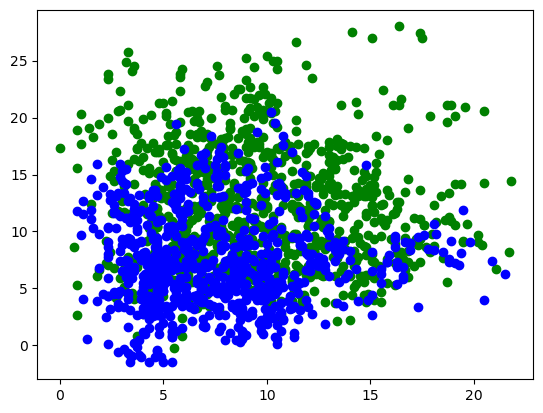

In [14]:
# Use boolean selection on the dataframe to show in blue points for day times (h8-20) and in green
# points for night times (h 0-8 and 20-23) (with some transparency if you like)
day_time_sel = meteo_df["hour"].between(8, 20)

day_df = meteo_df[day_time_sel]
night_df = meteo_df[~day_time_sel]
f, ax = plt.subplots()

for df, col in zip([day_df, night_df], ["green", "blue"]):
    ax.scatter(df["wind_speed_10m"], df["temperature_2m"], c=col)

In [19]:
meteo_df[meteo_df["month"] == 3].index

Index([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       ...
       830, 831, 832, 833, 834, 835, 836, 837, 838, 839],
      dtype='int64', length=744)

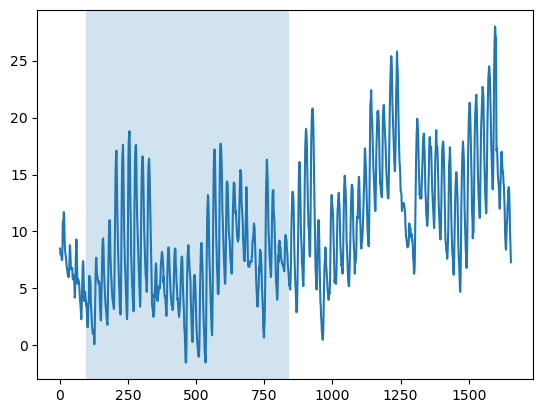

In [24]:
# Make a new line plot showing temperature over time, making sure you properly label your axes 

# Use axvspan to visualize the time interval corresponding to March:

f, ax = plt.subplots()
plt.plot(meteo_df["temperature_2m"])

month_indxs = meteo_df[meteo_df["month"] == 3].index
plt.axvspan(month_indxs[0], month_indxs[-1], alpha=0.2)

In [20]:
# Do again the line plot for temperature, but now highlight all hours with a temperature above 20 degrees.
# Visualize the threshold using axhline and use scatter() to show all hours above the threshold overlayed
# over (! make sure they are over) the line plot:

#### 1.5.1 Subplots

In [22]:
# Create two plots one on top of the other using matplotlib's subplots function.

# In the top plot, show temperature series.

# In the bottom plot, show the relative humidity series.

# Make sure the two plots share the same x axis (if you are using an interactive backend, x axis will remain link as you explore the plot)

# Hint: you can pass the sharex=True argument to the subplots function to easily 
# make the two plots share the same x axis:

In [ ]:
# Create a 2 x 2 grid of plots using matplotlib's subplots function.

# In each plot, we will show the correlation of a variable with the temperature. 
# Temperature should always be on the x axis, and the other variable on the y axis.

# Top left should show the correlation of temperature with relative humidity, top right with wind speed,
# bottom left with precipitation, bottom right with time of the day.

# Try to use a for loop to iterate over the axes of the grid, and use the .scatter() method to plot the data!


In [ ]:
# Try to save the image as pdf and download it to your computer:


#### 1.5.2 the `seaborn` library

In [ ]:
# Make a violinplot to show the distribution of wind speeds for each month in the dataset

In [ ]:
# Make a swarmplot to show the distribution of temperature for each month of the dataset
# (each month should appear as a different column of points!)


In [31]:
# Make a lmplot showing the correlation between temperature and time of the day for each different
# month of the year:


In [ ]:
# plot all the variables in one plot (except precipitation) using seaborn's relplot and the x, y, hue, size and col options.
# You can choose to which variable to use for x,y, size etc, but make an informed choice based on what you know about the data.


In [ ]:
# combine seaborn and matplotlib - back to the Allen brain example from last time

# Use the read_csv function to read data from the links!
import pandas as pd
root_url_string = "https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/"
neuron_df = pd.read_csv(root_url_string + "allen_neurons.csv")
channel_df = pd.read_csv(root_url_string + "allen_channels.csv")
session_df = pd.read_csv(root_url_string + "allen_sessions.csv")

# create a publication-ready figure with 2 subplots. You can use either seaborn or matplotlib.
# the left plot should show all the mouse demographics so that the audience can tell the age, sex and strain of every mouse used.
# the right plot should show a distribution of the firing rates
# make sure that the axes have no underscores, all the labels are readable and the legend is well positioned. It should look literally look ready to publish!


